In [10]:
import torch

#pytorch works with tensor objects
#Here is how you initialize tensor objects

x=torch.tensor([3,2,3])
print(x)
print(x.size()) #can print the size of the tensor

#randomize
y=torch.rand(3,2) #random 3 by 2 matrix
print(y.size()) #can print size of tensor as shown here

#fill with ones
z=torch.ones(3,2)
print(z)

#fill with zeros
f=torch.ones(3,2)
print(f)

#most of pytorch works with the float32 format
#It is best to change the type of the tensor to float32

x=torch.tensor([3,2,3],dtype=torch.float32)
print(x)

tensor([3, 2, 3])
torch.Size([3])
torch.Size([3, 2])
tensor([[1., 1.],
        [1., 1.],
        [1., 1.]])
tensor([[1., 1.],
        [1., 1.],
        [1., 1.]])
tensor([3., 2., 3.])


In [16]:
#you can also change the dimension of the tensor

print(x.size())
x=x.view(3,1) #change x into a 3 by 1 matrix
print(x)

x=x.view(1,-1) #can use -1 and pytorch will infer the remaining size based on the other size you gave
print(x)

torch.Size([3, 1])
tensor([[3.],
        [2.],
        [3.]])
tensor([[3., 2., 3.]])


In [11]:
#Here we will build a simple linear regression model from scratch using pytorch autograd function
import torch

x=torch.tensor([1,2,3,4],dtype=torch.float32) #initialzie vars
y=torch.tensor([2,4,6,8],dtype=torch.float32)

w=torch.rand((1),dtype=torch.float32, requires_grad=True) #initialize weights, we are interested in its gradient

def forward(x):
    return w*x

def loss(y,y_pred):
    return ((y_pred-y)**2).mean() #MSE

lr=0.01
iters=301

for epoch in range(iters):
    y_pred=forward(x)
    l=loss(y,y_pred)
    
    l.backward()           #gets the gradient of the loss wrt to the weights
    
    with torch.no_grad():  #Need to include this as we do not need grad calculation in updates of weights
        w-=lr*w.grad       #adjust the weights
        
    w.grad.zero_()         #Need to reset the value of the gradient after each epoch
    
    if epoch % 50 == 0:    #Only print out epochs that are multiples of 20
        
        print("Epoch Number: ", epoch, " Weight: ",w.item(), " Loss: ", l.item()) #item only works if 1 item, if many use .data
    

Epoch Number:  0  Weight:  0.7420543432235718  Loss:  16.42658042907715
Epoch Number:  50  Weight:  1.999627947807312  Loss:  1.4370993994816672e-06
Epoch Number:  100  Weight:  1.9999996423721313  Loss:  8.988365607365267e-13
Epoch Number:  150  Weight:  1.9999996423721313  Loss:  8.988365607365267e-13
Epoch Number:  200  Weight:  1.9999996423721313  Loss:  8.988365607365267e-13
Epoch Number:  250  Weight:  1.9999996423721313  Loss:  8.988365607365267e-13
Epoch Number:  300  Weight:  1.9999996423721313  Loss:  8.988365607365267e-13


Epoch Number:  0  Weight:  0.4122750163078308  Loss:  26.168209075927734
Epoch Number:  50  Weight:  1.9995304346084595  Loss:  2.2889221327204723e-06
Epoch Number:  100  Weight:  1.9999996423721313  Loss:  8.988365607365267e-13
Epoch Number:  150  Weight:  1.9999996423721313  Loss:  8.988365607365267e-13
Epoch Number:  200  Weight:  1.9999996423721313  Loss:  8.988365607365267e-13
Epoch Number:  250  Weight:  1.9999996423721313  Loss:  8.988365607365267e-13
Epoch Number:  300  Weight:  1.9999996423721313  Loss:  8.988365607365267e-13
Epoch Number:  350  Weight:  1.9999996423721313  Loss:  8.988365607365267e-13
Epoch Number:  400  Weight:  1.9999996423721313  Loss:  8.988365607365267e-13
Epoch Number:  450  Weight:  1.9999996423721313  Loss:  8.988365607365267e-13
Epoch Number:  500  Weight:  1.9999996423721313  Loss:  8.988365607365267e-13


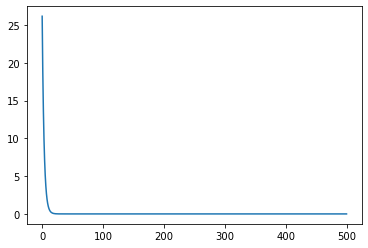

When X = 5, Y = 9.999998092651367


In [12]:
#We can further optimize this model by calling the optimizer function in pytorch to calculate the loss for us

import torch
import torch.nn as nn
import torch.nn.functional as F

import matplotlib.pyplot as plt

x=torch.tensor([1,2,3,4],dtype=torch.float32) #initialzie vars
y=torch.tensor([2,4,6,8],dtype=torch.float32)

w=torch.rand((1),dtype=torch.float32, requires_grad=True) #initialize weights, we are interested in its gradient

def forward(x):
    return w*x

loss=F.mse_loss          #We used the torch.nn.functional MSE loss instead of calculating it ourselves

lr=0.01
iters=501
errors=[]
epochs=[]

for epoch in range(iters):
    y_pred=forward(x)
    l=loss(y,y_pred)       #This part is still the same even for the functional MSE loss
    
    l.backward()           
    
    with torch.no_grad():  
        w-=lr*w.grad       
        
    w.grad.zero_()         
    
    errors.append(l.item())  #appending the loss to the error list
    epochs.append(epoch)     #appending the epochs to the epochs list
    
    if epoch % 50 == 0:    
        
        print("Epoch Number: ", epoch, " Weight: ",w.item(), " Loss: ", l.item())
    
plt.plot(errors)    #plot out how the loss function changes with time
plt.show()

print("When X = 5, Y =",forward(5).item())

In [1]:
#Instead of having to define the function, we can use simple pre-built ones from pytorch nn 

import torch
import torch.nn as nn


inputs=torch.tensor([73,67,43,91,88,64,87,134,58,102,43,37,69,96,70,73,67,43,91,88,64,87,134,58,102,43,37,69,96,70,73,67,43,91,88,64,87,134,58,102,43,37,69,96,70],dtype=torch.float32)
inputs=inputs.view(-1,3)
print(inputs.size())

targets=torch.tensor([56,70,81,101,119,133,22,37,103,119,56,70,81,101,119,133,22,37,103,119,56,70,81,101,119,133,22,37,103,119],dtype=torch.float32)
targets=targets.view(-1,2)
print(targets)

from torch.utils.data import TensorDataset

trainds=TensorDataset(inputs,targets) #you feed TensorDataset the input and target dataset 
                                      #returns the pairs of input and target data in the form of tuples
    
    
trainds[[1,3,5,7]]                    #Retrieving items with these index from the original dataset
trainds[0:3]                          #Retrieve first 3 rows of input and target data

torch.Size([15, 3])
tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.],
        [ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.],
        [ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.]])


(tensor([[ 73.,  67.,  43.],
         [ 91.,  88.,  64.],
         [ 87., 134.,  58.]]),
 tensor([[ 56.,  70.],
         [ 81., 101.],
         [119., 133.]]))

In [2]:
#Use torch's DataLoader
#Splits the data into batches of predefined size, can do shuffling and random sampling

from torch.utils.data import DataLoader  

batch_size=5
traindl=DataLoader(trainds, batch_size, shuffle=True)   #DataLoader takes in batches of tuples from TensorDataset

for xb,yb in traindl:
    print(xb)
    print(yb)
    break       #Only see the first batch of inputs and outputs

tensor([[ 69.,  96.,  70.],
        [ 73.,  67.,  43.],
        [ 87., 134.,  58.],
        [102.,  43.,  37.],
        [ 87., 134.,  58.]])
tensor([[103., 119.],
        [ 56.,  70.],
        [119., 133.],
        [ 22.,  37.],
        [119., 133.]])


In [3]:
#Instead of writing out the linear formula, we can use pytorch's nn.Linear function

import torch.nn.functional as F

model=nn.Linear(3,2)             #nn.Linear(inputs features, outputs features), randomizes initial weights and biases
                                 #our data is 15x3 15 data points, 3 parameters
# print((model.weight))
# print(model.bias)

#print(list(model.parameters()))  #Does the same thing as printing the weights and bias

pred=model(inputs)                #We feed the model the inputs
#print(pred)
loss=F.mse_loss 

print(loss(pred,targets).item())  #We calculate the loss in our model prediction and the true value

6511.67626953125


In [4]:
#Instead of manually manipulating the model's weights and biases using gradient descent
#We can use the optimizer optim.SGD

opt=torch.optim.SGD(model.parameters(), lr=0.00001)  #Optim takes in the model parameters, learning rate

Now we train the model with the same process

1. Generate Prediction
2. Calculate the Loss
3. Compute Gradient wrt to weight and biases
4. Adjust the weights by subtracting a small quantity proportional to the gradient
5. Reset the gradients to zero

In [5]:
def fit(num_epochs, model, loss_fn, opt):
    
    #loop for epochs
    for epoch in range(num_epochs):
        
        #Train with batches of data
        for xb,yb in traindl:
            
            #Generate Prediction
            pred=model(xb)
            
            #Calculate the Loss
            l=loss(pred,yb)
            
            #Compute gradient
            l.backward()
            
            #Update parameters using gradients
            opt.step()                                 #Weights are updated in opt.step, no more w-=lr*w.grad
            
            #Reset gradient to zero
            opt.zero_grad()
            
        if (epoch)%10==0:
            print("Epoch: ",epoch, "Loss: ", l.item())
            
fit(100, model, loss, opt)

print(model(inputs))

Epoch:  0 Loss:  4435.55078125
Epoch:  10 Loss:  455.6368103027344
Epoch:  20 Loss:  194.05718994140625
Epoch:  30 Loss:  51.27599334716797
Epoch:  40 Loss:  94.11598205566406
Epoch:  50 Loss:  77.73578643798828
Epoch:  60 Loss:  82.37474060058594
Epoch:  70 Loss:  53.32758331298828
Epoch:  80 Loss:  27.34716796875
Epoch:  90 Loss:  23.38990592956543
tensor([[ 58.4779,  70.8996],
        [ 84.6135,  98.2648],
        [111.3765, 137.3514],
        [ 28.6478,  40.6020],
        [101.6733, 112.8012],
        [ 58.4779,  70.8996],
        [ 84.6135,  98.2648],
        [111.3765, 137.3514],
        [ 28.6478,  40.6020],
        [101.6733, 112.8012],
        [ 58.4779,  70.8996],
        [ 84.6135,  98.2648],
        [111.3765, 137.3514],
        [ 28.6478,  40.6020],
        [101.6733, 112.8012]], grad_fn=<AddmmBackward>)


In [1]:
#Summary of Using mini batch and SGD with Optimizer.step() and l.backward()


import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

inputs=torch.tensor([1,2,3,4,5],dtype=torch.float32)
targets=torch.tensor([2,4,6,8,10],dtype=torch.float32) 

trainbatch=TensorDataset(inputs,targets)                     #Pairs input and output into tuples

batch_size=5                                                 #Set batch size to 5
traindl=DataLoader(trainbatch, batch_size, shuffle=True )    #Gets mini batches of size 5 and shuffle

model=nn.Linear(5,5)                                         #Linear regression model

# pred=model(inputs) 
loss=F.mse_loss

opt=torch.optim.SGD(model.parameters(), lr=0.01)             #define optimizer

def fit(epoch, model, loss_fun, opt):                        #function to tune weights of the model
    
    for epoch in range(epoch):
        
        for xb,yb in traindl:                                 #for each batch in the data
            
            pred=model(xb)
            
            l=loss(pred,yb)
            
            l.backward()
            
            opt.step()
            
            opt.zero_grad()
          
        if epoch%50==0:  
            print("Epoch: ", epoch, "Loss: ",l.item())
    
fit(500,model,loss,opt)
print(model(inputs))

Epoch:  0 Loss:  40.033790588378906
Epoch:  50 Loss:  2.504578113555908
Epoch:  100 Loss:  0.6076387763023376
Epoch:  150 Loss:  0.19098444283008575
Epoch:  200 Loss:  0.06361020356416702
Epoch:  250 Loss:  0.09330252557992935
Epoch:  300 Loss:  0.02680574357509613
Epoch:  350 Loss:  0.012361934408545494
Epoch:  400 Loss:  0.0036960337311029434
Epoch:  450 Loss:  0.0009362015989609063
tensor([2.0040, 4.0162, 6.0041, 7.9948, 9.9678], grad_fn=<AddBackward0>)
